# Project: Investigate a Dataset - TMDb Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

<em>The TMDb Dataset consists of data of approximately 10,000 movies that includes user rates and revenue.</em>

<strong>The following trends will be explored:</strong>
- Popularity over time (years)
- Revenue over time (years)
- Budget over time (years)

<strong>The following associations and effects to analyze are:</strong>
- Vote Counts compared to Revenue
- Vote Counts compared to Budget
- Vote Counts compared to Runtime

<strong>We will be exploring questions such as:</strong>
- What are the trends over time of popularity, revenues, and budget?
- How much does vote counts affect the amount of revenue, budget, and runtime of a movie?

The analysis performed here are elementary, and as such any associations are provisional. Visualizations and initiatory correlations are made in this project. Any relationships implied will simply be used as a reference for possible future statisical analysis. 

The three variables investigated here are:

- single-variable explorations: Popularity, revenue, budget over time.

- multiple-variable explorations: Vote Counts over time for the factors revenue, budget, and runtime.





In [26]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import csv # read and write csv files
from datetime import datetime # operations to parse dates
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

The data is fairly clean: One duplicate record is found and is deleted. 

### General Properties

<strong>Observations:</strong>
- There are 10866 rows, with 21 columns. 
- The code shows there are Null values present in:
    - imdb_id
    - cast
    - homepage
    - director
    - tagline
    - keywords
    - overview
    - genres
    - production_companies
 
 <strong>Next Steps:</strong>
 
1. The imdb_id(s) are significant to identify distinct records. 10 are missing out of 10865 (after dropping the duplicate record). These 10 were dropped. 
2. Since no other values are distinct, they will simply be kept without dropping them. 

In [27]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv("tmdb-movies.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [28]:
sum(df.duplicated())

1

In [29]:
df.drop_duplicates(inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

In [31]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning (Replace this with more specific notes!)

In [32]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.dropna(subset=['imdb_id'], inplace=True)  
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 21 columns):
id                      10855 non-null int64
imdb_id                 10855 non-null object
popularity              10855 non-null float64
budget                  10855 non-null int64
revenue                 10855 non-null int64
original_title          10855 non-null object
cast                    10779 non-null object
homepage                2934 non-null object
director                10815 non-null object
tagline                 8038 non-null object
keywords                9368 non-null object
overview                10852 non-null object
runtime                 10855 non-null int64
genres                  10834 non-null object
production_companies    9830 non-null object
release_date            10855 non-null object
vote_count              10855 non-null int64
vote_average            10855 non-null float64
release_year            10855 non-null int64
budget_adj              1

In [33]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [34]:
#Saving clean datasets
df.to_csv('data_imdb.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis


### What are the trends over time of Popularity, Revenues, and Budget?

First, our data is grouped by years, using the 'release_year' column. 

Then, we create visualizations using built-in functions, so we can have the data make more sense in a way that's much more readable and allows visual exploration. 

In [35]:
# Imported data from cleaned dataset
df_imdb = pd.read_csv('data_imdb.csv')
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10855 entries, 0 to 10854
Data columns (total 21 columns):
id                      10855 non-null int64
imdb_id                 10855 non-null object
popularity              10855 non-null float64
budget                  10855 non-null int64
revenue                 10855 non-null int64
original_title          10855 non-null object
cast                    10779 non-null object
homepage                2934 non-null object
director                10815 non-null object
tagline                 8038 non-null object
keywords                9368 non-null object
overview                10852 non-null object
runtime                 10855 non-null int64
genres                  10834 non-null object
production_companies    9830 non-null object
release_date            10855 non-null object
vote_count              10855 non-null int64
vote_average            10855 non-null float64
release_year            10855 non-null int64
budget_adj              1

In [36]:
df_trends = df_imdb.groupby('release_year').mean()

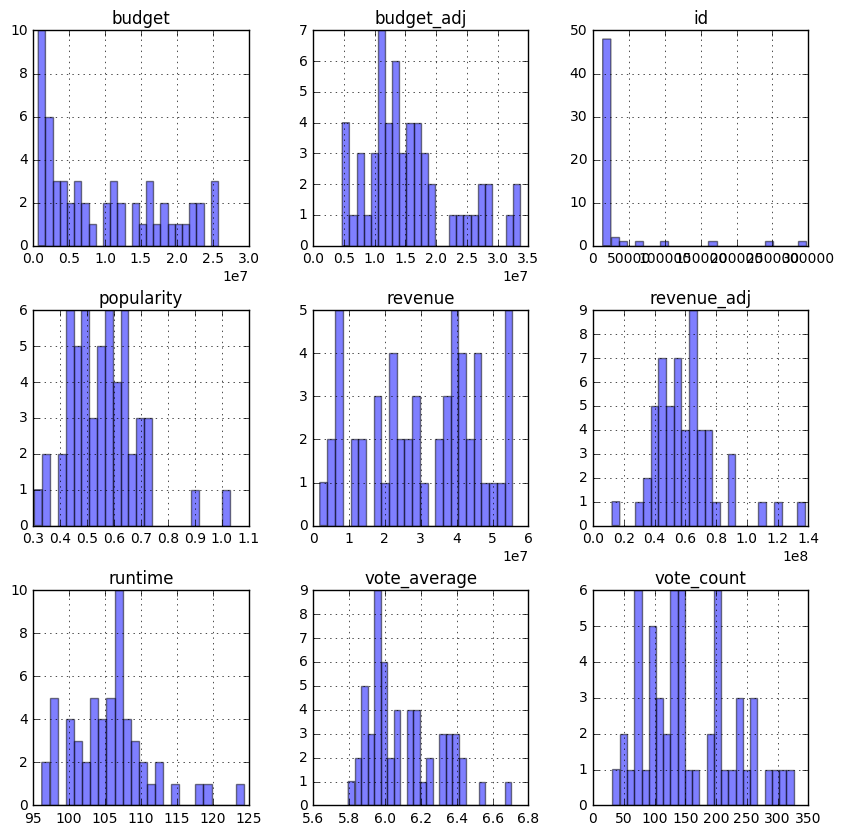

In [37]:
#Beginning exploration to determine visually if there's possible trends
df_trends.hist(bins=25, alpha=0.5, figsize=(10,10));

<h3>Popularity:</h3>

These explorations will go over what are the likely rates a movie will receive over the years. Again, using a histogram, we can observe the popularity counts, with the max count identifying the characteristic popularity ratings of movies. 

In [38]:
def make_histogram(data, key_name, xlabel = None, ylabel = None, title = None, bin_number = None):
    make_hist = data[key_name].hist(bins = bin_number)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);
    return make_hist
    
    

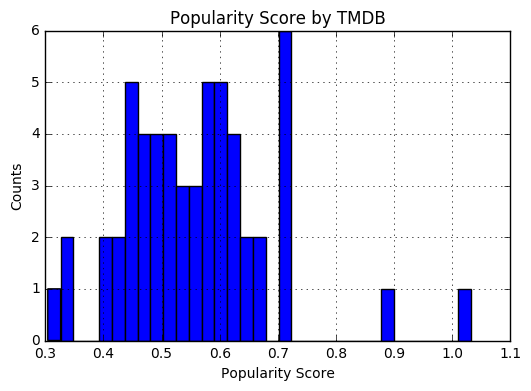

In [39]:
popularity_histogram = make_histogram(df_trends, 'popularity', xlabel = 'Popularity Score', ylabel = 'Counts', title = 'Popularity Score by TMDB', bin_number = 33)

In [40]:
#Using stats to better understand the above visualization using the describe function.
df_trends['popularity'].describe()

count    56.000000
mean      0.559693
std       0.128434
min       0.304112
25%       0.469625
50%       0.546928
75%       0.626934
max       1.032126
Name: popularity, dtype: float64

<h3>Popularity Rating Observations:</h3>

From the histogram you can determine that the distribution is skewed right. With the help of the quartile percentages one can interpret that most the ratings are between 0.47 and 0.63. There are multiple areas with no values that may need to be further looked at to determine possible reasoning. 

<h3>Revenue:</h3>

Through this exploration, a likely revenue for a movie over the years will be ascertained. As before, a histogram is used to observe revenue counts with max counts reflecting the normal revenue from movies. 

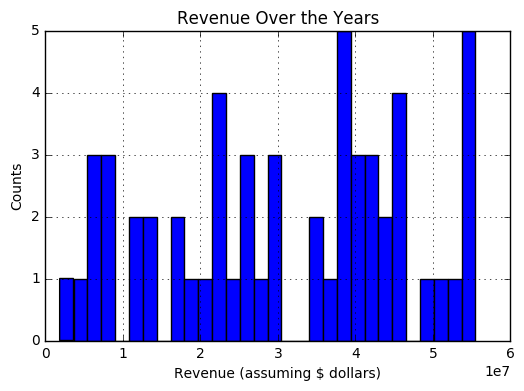

In [41]:
revenue_histogram = make_histogram(df_trends, 'revenue', xlabel = 'Revenue (assuming $ dollars)', ylabel = 'Counts', title = 'Revenue Over the Years', bin_number = 30)

In [42]:
#Using stats to better understand the above visualization using the describe function.
df_trends['revenue'].describe()

count    5.600000e+01
mean     3.076766e+07
std      1.574209e+07
min      1.842102e+06
25%      1.815642e+07
50%      3.257984e+07
75%      4.293171e+07
max      5.549569e+07
Name: revenue, dtype: float64

<h3>Revenue Observations:</h3>

The plots and histogram illustrate: the distribution is skewed to the left. Visually, the histogram seems a bit varied. The average revenue for a movie is 3.076766e+07.

<h3>Budget:</h3>

Through this exploration, a likely budget for a movie over the years will be ascertained. As before, a histogram is used to observe revenue counts with max counts reflecting the normal budget for movies. 

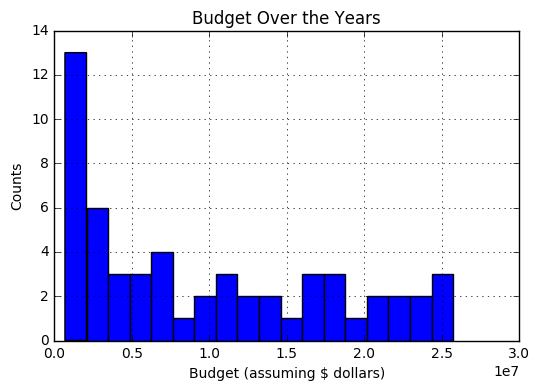

In [43]:
budget_histogram = make_histogram(df_trends, 'budget', xlabel = 'Budget (assuming $ dollars)', ylabel = 'Counts', title = 'Budget Over the Years', bin_number = 18)

In [44]:
#Using stats to better understand the above visualization using the describe function.

df_trends['budget'].describe()

count    5.600000e+01
mean     9.833150e+06
std      8.023062e+06
min      6.892796e+05
25%      2.426431e+06
50%      6.906936e+06
75%      1.645743e+07
max      2.573766e+07
Name: budget, dtype: float64

<h3>Observations about Budget:</h3>

The histogram illustrates: the distribution is skewed to the right. The statisical analysis shows that the average budget is 9.833150e+06 with a statistical deviation of 8.023062e+06.  

<h2>Exploratory Data Analysis</h2>

<h3>How much does vote count affect revenue, budget, and runtime?</h3>

Action Steps:
1. We will be using the pearson correlation on our dataset grouped over the years. The pearson correlation analyzes the linear relationship between two continuous variables. We are assuming that a change in one variable will most likely create a proportional change in another. In this case, that a greater popularity has a positive affect on revenue. 

2. We will then create a scatter plot to view what if any relationships popularity has with revenue. 

In [45]:
df_trends.corr(method='pearson')

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
id,1.000000,0.612610,0.100292,0.152558,-0.441775,0.539964,-0.297719,-0.148336,-0.299723
popularity,0.612610,1.000000,0.668215,0.759156,-0.488974,0.849314,-0.574979,0.458952,-0.100506
budget,0.100292,0.668215,1.000000,0.906124,-0.401485,0.782026,-0.731797,0.891925,-0.158415
revenue,0.152558,0.759156,0.906124,1.000000,-0.466239,0.809243,-0.706442,0.767164,0.074952
runtime,-0.441775,-0.488974,-0.401485,-0.466239,1.000000,-0.612715,0.524770,-0.073168,0.300077
vote_count,0.539964,0.849314,0.782026,0.809243,-0.612715,1.000000,-0.658819,0.505434,-0.215568
vote_average,-0.297719,-0.574979,-0.731797,-0.706442,0.524770,-0.658819,1.000000,-0.557569,0.377204
budget_adj,-0.148336,0.458952,0.891925,0.767164,-0.073168,0.505434,-0.557569,1.000000,0.050086
revenue_adj,-0.299723,-0.100506,-0.158415,0.074952,0.300077,-0.215568,0.377204,0.050086,1.000000


<strong>The above correlation reveals:</strong>

- The correlation coefficient between vote count and revenue is 0.81, which repesents a strong uphill positive linear relationship; meaning that their is a strong relationship between increased vote counts and the amount of revenue a movie will generate.

- The correlation coefficient between vote count and budget is 0.78, which repesents a strong uphill positive linear relationship; meaning that their is a strong relationship between increased vote counts and the alotted budget a movie has (higher vote count is correlated to a higher budget).

- The correlation coefficient between vote count and runtime is -0.61, which repesents a strong downhill negative linear relationship; meaning that their is a negative relationship between vote counts and the alotted runtime a movie has (If the vote count is higher, it seems to be correlated to less run time).

<h3>Vote Counts compared to Revenue:</h3>

In [46]:
def make_scatter(data, x_key_name, y_key_name, xlabel = None, ylabel = None, title = None):
    make_scatter = plt.scatter(x = data[x_key_name], y = data[y_key_name])
    x = data[x_key_name]
    y = data[y_key_name]
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    return make_scatter

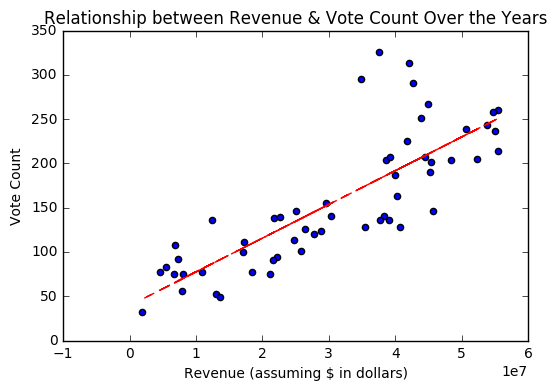

In [47]:
revenue_scatterplot = make_scatter(df_trends, 'revenue', 'vote_count', 'Revenue (assuming $ in dollars)', 'Vote Count', 'Relationship between Revenue & Vote Count Over the Years')

<strong>Observations between revenue & vote counts:</strong>

The linear regression line helps illustrate the strong uphill positive linear relationship between revenue and vote counts. The possible outliers on the graph with higher vote counts that grossed relatively less may need to be further scrutinized. 

<h3>Vote Counts compared to Budget:</h3>

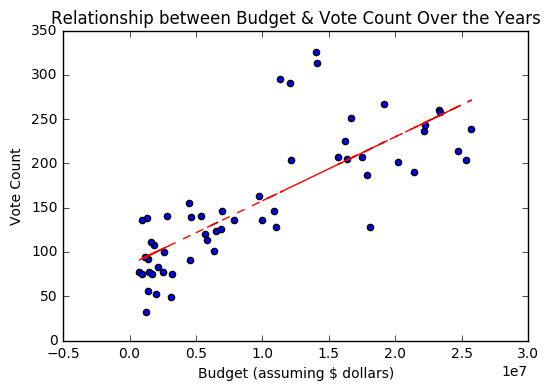

In [48]:
budget_scatterplot = make_scatter(df_trends, 'budget', 'vote_count', 'Budget (assuming $ dollars)', 'Vote Count', 'Relationship between Budget & Vote Count Over the Years')

<strong>Observations on how vote count can affect budget:</strong>

One can tell from the scatterplot that the correlation is noticeable. With the aid of the correlation coefficient, as shown by the linear regression line, we can see that there is a strong uphill positive relationship between the two variables. There's quite a number of points forming cluster between 0.1 and 0.5 on the X-Axis. This demonstrates that movies with a low vote count are correlated to having a lower budget. 

<h3>Vote Counts compared to Runtime:</h3>

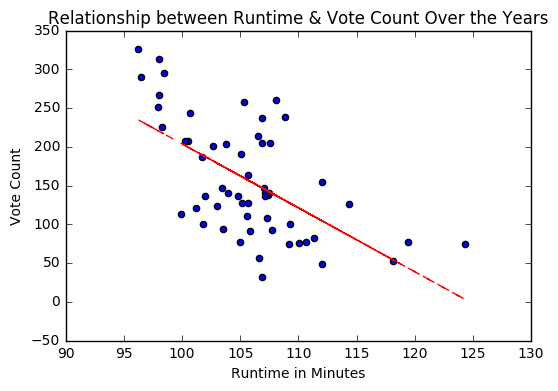

In [49]:
runtime_scatterplot = make_scatter(df_trends, 'runtime', 'vote_count', 'Runtime in Minutes', 'Vote Count', 'Relationship between Runtime & Vote Count Over the Years')

<strong>Observations on how runtime can affect vote counts:</strong>
The correlation is evident in the scatter plot. Of interesting thing to note is the cluster between 100 - 110 minutes and between approximately 75 to 150 vote counts. Here we see a strong downhill negative relationship between runtime and vote counts.

Further scrutiny is needed to determine if runtime affects vote count or vote count affects runtime, especially since there are very few data points past approximately 112.5 minutes. 

<h2>Assumptions (Limitations):</h2>

Assumptions were made as the data was taken as is. 

In the case of revenue, it was assumed that the revenues were of a standard currency. If it wasn't, determining a standard currency would be paramount in correcting possible faults of the observation. Revenue could also mean multiple sources of income: t-shirt sales, ticket sales, toy sales, etc. compared to what was assumed in this exploraratory sessions as revenue from ticket sales. 

Popularity is also open to interpretation, as it seems TMDb gives the popularity score based on multiple data points. As the popularity score is in fact an interpreted score, there are possible errors on the part of the interpreter that cannot be accounted for when using said score. 

When are vote counts taken place and how is voting conducted? We assume that vote counts are taken after the movie and assume that this is total vote counts including possible screening times and in different areas of the world. Whether the votes are good or bad or any other qualitative or quantitative methods use we currently haven't investigated. 


<a id='conclusions'></a>
## Conclusions

Our exploratory data analysis reveals that there are possible patterns to popularity and revenues. When it comes to popularity it seems that through this data 95% of the sample population lie between 0.3 to 0.82 with most movies averaging a score of 0.56. For revenue over the years, it seemed that most movies would have an average of 3.076766e+07 in revenue. On the other hand, it seemed that most movies would have an average of 9.833150e+06 when it comes to budget.

We further determined that vote counts have a strong positive affect on revenue and budget with a correlation coefficient of 0.81 and 0.78 respectively. While vote counts have a strong negative affect on runtimes.

We must reiterate that these relationships are merely correlations and do not imply causation. 

In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0